<a href="https://colab.research.google.com/github/arsaha28/EE954_ASSIGNMENT_GR21/blob/anup_2_mlp/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
### Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Key Characteristics

* **Image Resolution:** Each image in the MNIST dataset is 28x28 pixels, with a single color channel (grayscale).
* **Number of Classes:** The dataset has 10 classes, representing the digits 0 through 9.
* **Color Format:** Grayscale (1 channel), with pixel values ranging from 0 to 255 in the raw data. After applying transforms.ToTensor(), these values are scaled between 0 and 1.

### Dataset Composition
* **Training Set:** 60,000 images, used for training models.
* **Test Set:** 10,000 images, used for evaluating model performance.

### Typical Usage
The dataset is often divided into three subsets for practical machine learning workflows:

* **Training Set (80% of the original training data + Testing data)**: Used for training the model on 56,000 images.
* **Validation Set (10% of the original training data + Testing data):** Used for tuning hyperparameters and preventing overfitting, with 7,000 images.
* **Test Set (10% of the original training data + Testing data):** Used for final evaluation, with 7,000 images.

#### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


#### Transformation

* **ToTensor:** Converts each image to a PyTorch tensor and scales the pixel values to the range [0, 1].



## Basic concepts of CNN model :

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other.

Three basic components to define a basic convolutional neural network.

*   The Convolutional Layer
*   The Pooling layer
*   The Output layer

![](https://media.licdn.com/dms/image/v2/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1680532048475?e=1735776000&v=beta&t=Evq_XWpAo5JDVF4dy5tw2L8E7KDUgYwDrKtnTi5Go_I)





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

dataset_location = root = './data/'

In [ ]:
training_dataset = datasets.FashionMNIST(dataset_location,
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.FashionMNIST(dataset_location,
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8587314.46it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 132823.14it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2514963.24it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16961725.84it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
print("training dataset length =", len(training_dataset))
print("test dataset length =", len(test_dataset))

training dataset length = 60000
test dataset length = 10000


In [ ]:
#concatenate the data so that we can
combined_dataset = torch.utils.data.ConcatDataset([training_dataset, test_dataset])

#Initializing the ratios for the test, training and validation datasets
train_dataset_ratio = 0.8
test_dataset_ratio = 0.1
validation_dataset_ratio = 0.1

#Initalizing the new values of the training, testing and validation data sizes
train_dataset_size = int(train_dataset_ratio * len(training_dataset)+train_dataset_ratio*len(test_dataset))
test_dataset_size = int(test_dataset_ratio * len(training_dataset)+test_dataset_ratio*len(test_dataset))
validation_dataset_size = int(validation_dataset_ratio * len(training_dataset)+validation_dataset_ratio*len(test_dataset))

#create the datasets with the sizes

new_train_dataset, new_test_dataset, new_validation_dataset = torch.utils.data.random_split(combined_dataset, [train_dataset_size, test_dataset_size, validation_dataset_size])

In [ ]:
print(train_dataset_size)
print(test_dataset_size)
print(validation_dataset_size)
print(combined_dataset.cumulative_sizes)
print(len(new_train_dataset))
print(len(new_test_dataset))
print(len(new_validation_dataset))

56000
7000
7000
[60000, 70000]
56000
7000
7000


In [ ]:
sample_image, sample_label = new_train_dataset[0]
print("Min pixel value:", sample_image.min().item())
print("Max pixel value:", sample_image.max().item())


Min pixel value: 0.0
Max pixel value: 1.0


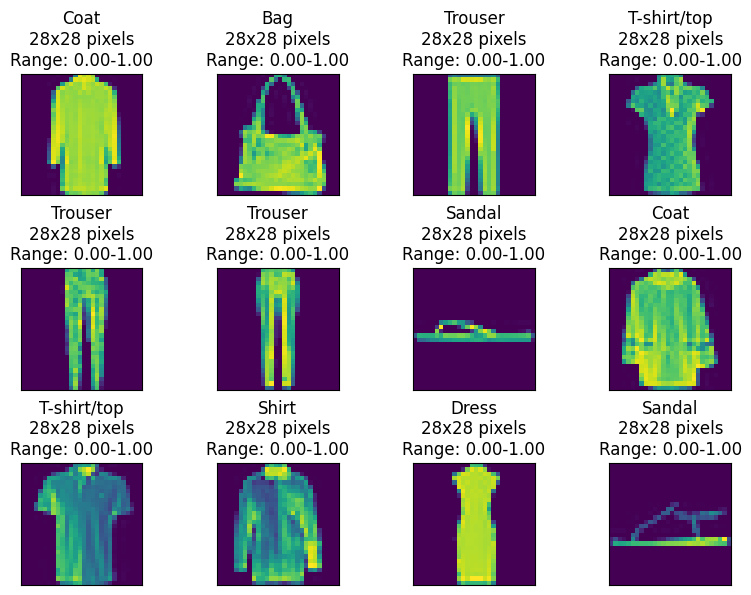

In [ ]:

#Defining class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Displaying a 4x4 grid of the first 16 images in the dataset with pixel size and pixel range
plt.figure(figsize=(8, 8))  # Set the size of the figure
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = new_train_dataset[i]

    min_pixel = image.min().item()
    max_pixel = image.max().item()

    plt.imshow(image.reshape((28,28)).squeeze())
    #plt.imshow(image.squeeze())

    # Display the class name, pixel size, and pixel range in the title
    plt.title(f"{class_names[label]}\n28x28 pixels\nRange: {min_pixel:.2f}-{max_pixel:.2f}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()  # Show the 6x6 grid


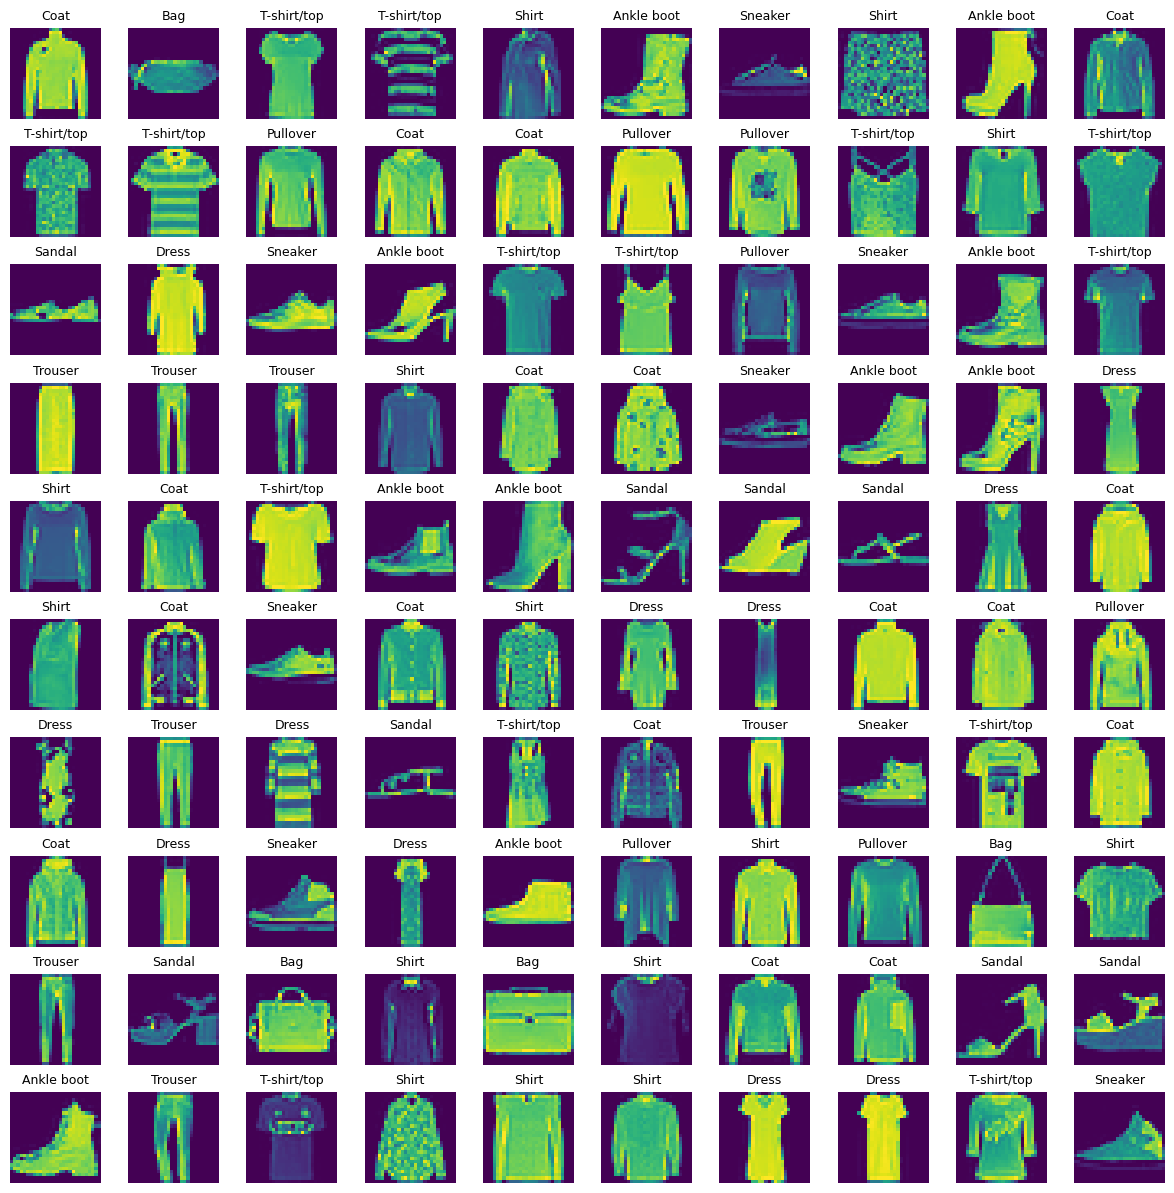

In [ ]:
# Now, display a random 15x15 grid of images
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel() # Flatten the grid to make it easier to access each subplot, 2D to 1D
n_train = len(new_train_dataset)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    sample_image, sample_label = new_train_dataset[index]
    axes[i].imshow(sample_image.reshape((28,28)))
    axes[i].set_title(class_names[sample_label], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [ ]:
# Relu activation function
def relu(x):
    return np.maximum(0, x)

# Derivative of Relu activation function
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [ ]:
#Softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [ ]:
#Fully connected layer
class NeuralNetwork:
    def flatten(self, X):
      """
      Flatten the input data X.

      Args:
      - X (numpy.ndarray): The input data to be flattened.

      Returns:
      - numpy.ndarray: The flattened data.
      """

      batch_size = X.shape[0]

      #Flatten each image/sample to a 1D vector
      return X.reshape(batch_size, -1) # output(batch size, flattened size)


    def __init__(self, input_size, input_layers_config, output_layers_config):
      """
      Initialize the neural network with the specified configuration.

      Args:
      - input_size (int): The size of the input layer.
      - input_layers_config (list): A list of dictionaries specifying the configuration of input layers.
      - output_layers_config (list): A list of dictionaries specifying the configuration of output layers.
      - layers (list): A list to store the layers of the neural network.
      - activation_functions (list): A list to store the activation functions for each layer.

      Returns:
      - None

      """
      self.layers = []
      self.activation_functions = []

      # Initialize weights and biases for each layer based on layers_config

      current_input_size = input_size

      for layer in input_layers_config:
          neurons = layer['neurons']
          activation = layer['activation']

          #initialize weights and bias(randomly)
          weights = np.random.randn(current_input_size, neurons) # shape of the matrix
          bias = np.random.randn(1, neurons)

          # Append weights, biases, and activation function to the model
          self.layers.append((weights, bias))
          self.activation_functions.append(activation)

          current_input_size = neurons

      # Initialize weights and biases for the output layer
      output_neurons = output_layers_config[0]['neurons']  # Assuming only one output layer
      output_activation = output_layers_config[0]['activation']

      output_weights = np.random.randn(current_input_size, output_neurons)
      output_bias = np.random.randn(1, output_neurons)


      # Append weights, biases, and activation function to the model
      self.layers.append((output_weights, output_bias))
      self.activation_functions.append(output_activation)


    def feedforward(self, X):
      """
      Perform a forward pass through the neural network.

      Args:
      - X (numpy.ndarray): The input to the network from CNN output.

      Returns:
      - yHat (numpy.ndarray): The output of the fully connected network.

      """
      for i, layer in enumerate(self.layers):
          weights, bias = layer
          if i == 0:
              # Calculate output of input layer
              X = np.dot(X, weights) + bias

          else:
              # Calculate output of hidden layer
              X = np.dot(X, weights) + bias

          # Apply activation function
          if self.activation_functions[i] == 'relu':
              X = relu(X)

          elif self.activation_functions[i] == 'softmax':
              X = softmax(X) # output of the model

          yHat = X

      return yHat



In [ ]:
input_layers_config = [
    {'neurons': 36, 'activation': 'relu'},
    {'neurons': 36, 'activation': 'relu'}
]
output_layers_config = [
    {'neurons': 10, 'activation': 'softmax'}
]


In [ ]:
#create dummy CNN output
import torch

dummy_cnn_output = torch.randn(32, 200)  # (batch_size, num_features)
print("Dummy CNN output shape:", dummy_cnn_output.shape)

Dummy CNN output shape: torch.Size([32, 200])


In [ ]:
#Initialize the neural network with flexible layer configuration
network = NeuralNetwork(input_size=200, input_layers_config=input_layers_config, output_layers_config=output_layers_config)

output = network.feedforward(dummy_cnn_output)
print(output)

[[9.82947094e-169 3.63057880e-225 2.30359067e-112 1.85773838e-180
  6.31821645e-039 1.00000000e+000 1.47949333e-302 1.83596600e-260
  4.24129859e-176 1.06260330e-118]
 [2.55927255e-189 0.00000000e+000 2.46407853e-235 1.25615034e-127
  4.79039842e-162 1.00000000e+000 0.00000000e+000 1.36969386e-269
  5.79492324e-253 5.42028540e-087]
 [8.93037836e-258 9.54022347e-252 2.02479888e-232 4.28718582e-171
  0.00000000e+000 1.00000000e+000 0.00000000e+000 1.14323972e-277
  4.86763755e-264 2.13343715e-158]
 [2.49691785e-317 0.00000000e+000 8.35950863e-249 4.30097119e-313
  9.66669982e-192 1.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 3.93365857e-169]
 [0.00000000e+000 6.73791377e-253 1.43265145e-221 2.27606440e-225
  1.52788513e-210 1.00000000e+000 4.18746386e-264 6.38575766e-105
  3.48494327e-202 3.34955727e-199]
 [0.00000000e+000 1.53455007e-309 4.72409537e-018 3.60748565e-064
  1.56551572e-076 8.53980298e-109 8.32550207e-273 3.01218335e-171
  1.00000000e+000 2.44095452e-180

<ipython-input-11-060e2eee01de>:3: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
<ipython-input-11-060e2eee01de>:4: RuntimeWarning: invalid value encountered in divide
  return exp_x / np.sum(exp_x, axis=1, keepdims=True)
